In [1]:
from coniii import *
from process_input import fish_input_process


/opt/homebrew/anaconda3/envs/test/lib/python3.10/site-packages/coniii/samplers.py:381: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def iterate_neighbors(n,ix,expdJ,r):
/opt/homebrew/anaconda3/envs/test/lib/python3.10/site-packages/coniii/samplers.py:2342: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def cross(vec1, vec2):


In [2]:
TIME = 3600

In [3]:
file = 'false_data.csv'
import pandas as pd
#read in data
data = pd.read_csv(file, header=None)

print(data.shape)


samples = fish_input_process(file,time=TIME)

print(samples.shape)
FISH_N = samples.shape[0]
FISH_N_PAIRS = int(FISH_N * (FISH_N - 1) / 2)

(3600, 91)
(3600, 91)


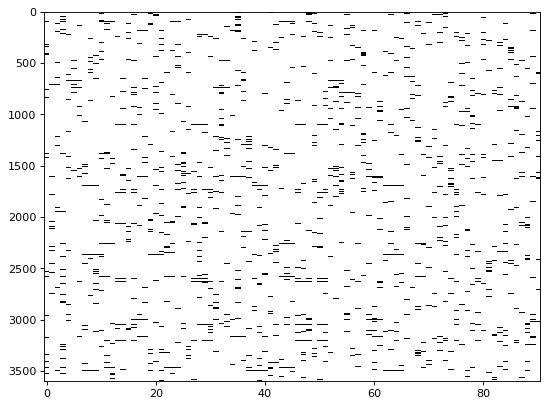

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(samples, aspect="auto", cmap="gray_r", interpolation="none")

['/opt/homebrew/anaconda3/envs/test/lib/python3.10/site-packages/coniii']


In [5]:
calc_e, calc_observables, mchApproximation = define_ising_helper_functions()
print(calc_e)
print(calc_observables)
print(mchApproximation)

CPUDispatcher(<function define_ising_helper_functions.<locals>.calc_e at 0x144158430>)
CPUDispatcher(<function define_ising_helper_functions.<locals>.calc_observables at 0x1441581f0>)
<function define_ising_helper_functions.<locals>.mch_approximation at 0x1440b9120>


In [ ]:
solver = ClusterExpansion(samples.T)

multipliers, ent, clusters, deltaSdict, deltaJdict= solver.solve(threshold=0.1, full_output=True)

/opt/homebrew/anaconda3/envs/test/lib/python3.10/site-packages/coniii/solvers.py:96: UserWarning: Assuming that calc_observables should be for Ising model.
  if iprint: warn("Assuming that calc_observables should be for Ising model.")
/opt/homebrew/anaconda3/envs/test/lib/python3.10/site-packages/coniii/solvers.py:105: UserWarning: Some pairwise correlations have magnitude close to one. Potential for poor solutions from diverging parameters.
  warn(msg)
/opt/homebrew/anaconda3/envs/test/lib/python3.10/site-packages/coniii/samplers.py:1187: UserWarning: Boost C++ implementation not available. Defaulting to slower sampling methods.
  warn("Boost C++ implementation not available. Defaulting to slower sampling methods.")


adaptiveClusterExpansion: Clusters of size 2


/opt/homebrew/anaconda3/envs/test/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)
/opt/homebrew/anaconda3/envs/test/lib/python3.10/site-packages/numpy/lib/scimath.py:296: RuntimeWarning: divide by zero encountered in log
  return nx.log(x)
/opt/homebrew/anaconda3/envs/test/lib/python3.10/site-packages/coniii/mean_field_ising.py:574: RuntimeWarning: invalid value encountered in subtract
  JnoDiag = J - scipy.diag(h)
/opt/homebrew/anaconda3/envs/test/lib/python3.10/site-packages/coniii/solvers.py:2263: RuntimeWarning: divide by zero encountered in log
  h = -np.log(freqs/(1.-freqs))
/opt/homebrew/anaconda3/envs/test/lib/python3.10/site-packages/coniii/solvers.py:2267: RuntimeWarning: divide by zero encountered in log
  Sinds = -freqs*np.log(freqs) - (1.-freqs)*np.log(1.-freqs)
/opt/homebrew/anaconda3/envs/test/lib/python3.10/site-packages/coniii/solvers.p

In [ ]:
J = multipliers[FISH_N:]

# 创建一个 N*N 的零矩阵
matrix = np.zeros((FISH_N, FISH_N))

# # 使用数组的前N个元素填充对角线
# matrix[np.diag_indices(FISH_N)] = multipliers[:FISH_N]

# 使用数组的后N+2(N*N-1)个元素填充上半矩阵
index = FISH_N
for i in range(FISH_N):
    for j in range(i+1, FISH_N):
        matrix[i, j] = multipliers[index]
        index += 1
# 获取上半矩阵（包含对角线）
upper_matrix = np.triu(matrix)

# 转置上半矩阵并将其添加到下半部分
lower_matrix = np.transpose(upper_matrix)
lower_matrix = np.tril(lower_matrix, -1)

# 将上半矩阵和转置的下半矩阵相加得到完整的矩阵
final_matrix = upper_matrix + lower_matrix

In [ ]:
#plot imshow and add lines
plt.imshow(final_matrix, aspect="auto", cmap="gray")
ax = plt.gca() # 获取当前的坐标轴
ax.set_xticks([x-0.5 for x in range(1, final_matrix.shape[1])], minor=True) # 设置x轴的小刻度
ax.set_yticks([y-0.5 for y in range(1, final_matrix.shape[0])], minor=True) # 设置y轴的小刻度
plt.grid(which='minor', linestyle='-', linewidth=2)
plt.colorbar()